In [1]:
import os 
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image

In [3]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0 , det_size=(640 , 640))

/Users/asthamishra/anaconda3/lib/python3.11/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/asthamishra/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/asthamishra/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/asthamishra/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/asthamishra/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/asthamishra/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None

In [21]:
swapper = insightface.model_zoo.get_model("inswapper_128.onnx",
                                          download=False,download_zip=False
                                         )


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


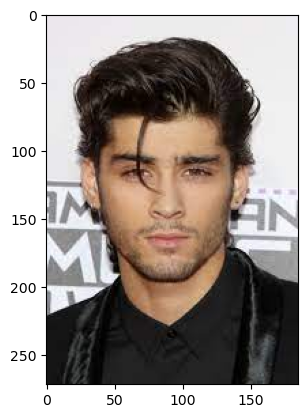

In [32]:
img= cv2.imread("download.jpeg")
plt.imshow(img[:,:,::-1])
plt.show()


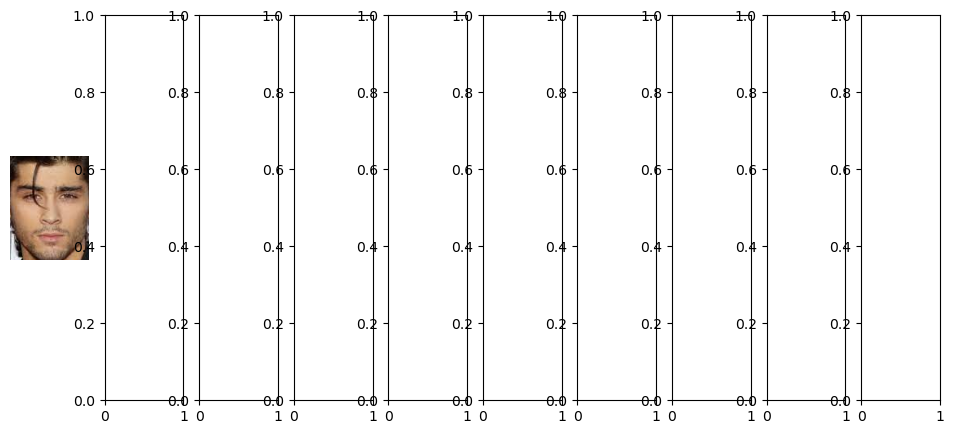

In [33]:
# Crop and plot faces

all_face_1=app.get(img)
fig , axs =plt.subplots(1 , 10 , figsize=(12,5)) # The image can have atmost 10 faces

for i , face in enumerate(all_face_1):
    bbox=face['bbox']
    bbox=[int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axs[i].axis("off")

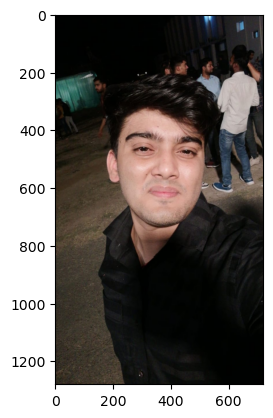

In [34]:
# The photo from which face is taken
photo= cv2.imread("WhatsApp Image 2023-09-02 at 00-Copy1.02.29.jpeg")
plt.imshow(photo[:,:,::-1])
plt.show()

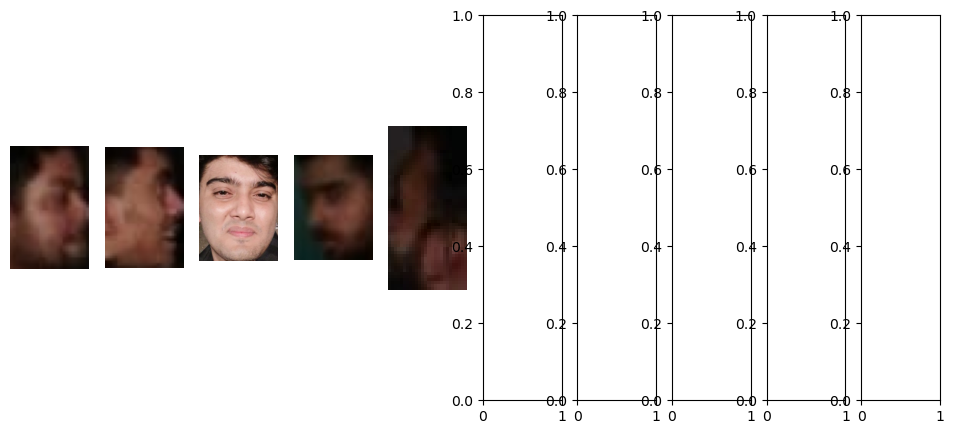

In [35]:
# Crop and plot faces

all_face_2=app.get(photo)
fig , axs =plt.subplots(1 , 10 , figsize=(12,5)) # The image can have atmost 10 faces

for i , face in enumerate(all_face_2):
    bbox=face['bbox']
    bbox=[int(b) for b in bbox]
    axs[i].imshow(photo[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axs[i].axis("off")

# When You want to replace all faces

In [36]:
# img=image_path_from_which_all_faces_has_to_be_replaced
# photo=image_from_which_a_face_has_to_be_taken
# i=index_of_face_that_has_to_be_replaced
# Indexing starts from 0
def all_faces_replacement(img,photo,i):
    img= cv2.imread(img)
    photo= cv2.imread(photo)
    
    # Detect the face
    
    faces = app.get(img)

    all_faces=app.get(photo)
    my_face=all_faces[i]

    # Replace the faces from image_on_which_we_will_swipe_face

    res = img.copy()

    for face in faces:
        res=swapper.get(res,face,my_face,paste_back=True)

    fig , ax = plt.subplots()
    ax.imshow(res[:,:,::-1])
    ax.axis('off')
    plt.show()

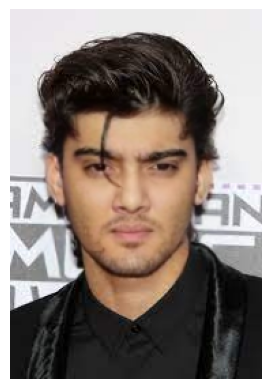

In [39]:
img="download.jpeg"
photo="WhatsApp Image 2023-09-02 at 00-Copy1.02.29.jpeg"
all_faces_replacement(img,photo,2)

# When you want to replace a selected face

In [41]:
# img=image_path_from_which_all_faces_has_to_be_replaced
# photo=image_from_which_a_face_has_to_be_taken
# i=index_of_face_that_has_to_be_replaced
# j=index_of_the_face_that_has_to_be_removed
# Indexing starts from 0
def selected_face_replacement(img,j,photo,i):
    img= cv2.imread(img)
    photo= cv2.imread(photo)
    
    # Detect the face
    
    faces = app.get(img)

    all_faces=app.get(photo)
    my_face=all_faces[i]

    # Replace the faces from image_on_which_we_will_swipe_face

    res = img.copy()


    res=swapper.get(res,faces[j],my_face,paste_back=True)

    fig , ax = plt.subplots()
    ax.imshow(res[:,:,::-1])
    ax.axis('off')
    plt.show()

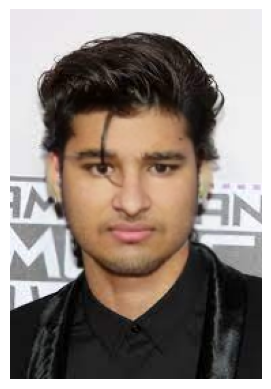

In [42]:
img="download.jpeg"
photo="WhatsApp Image 2023-09-18 at 18.03.57.jpeg"
selected_face_replacement(img,0,photo,3)